<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1500 non-null   object 
 1   Date           1500 non-null   object 
 2   CustomerID     1500 non-null   object 
 3   Category       1500 non-null   object 
 4   Product        1500 non-null   object 
 5   Quantity       1500 non-null   int64  
 6   UnitPrice      1500 non-null   float64
 7   TotalSales     1500 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 93.9+ KB
None
  TransactionID        Date CustomerID Category    Product  Quantity  \
0        T00001  2023-08-05      C0188   Snacks       Maní         7   
1        T00002  2023-10-16      C0184  Bebidas  Coca-Cola         3   
2        T00003  2023-07-03      C0139  Lácteos     Yogurt         3   
3        T00004  2023-12-01      C0076   Frutas        Uva         9   
4        T00005  2023-11-0

C:\Users\User\AppData\Local\Temp\ipykernel_5584\2523310621.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette='viridis')


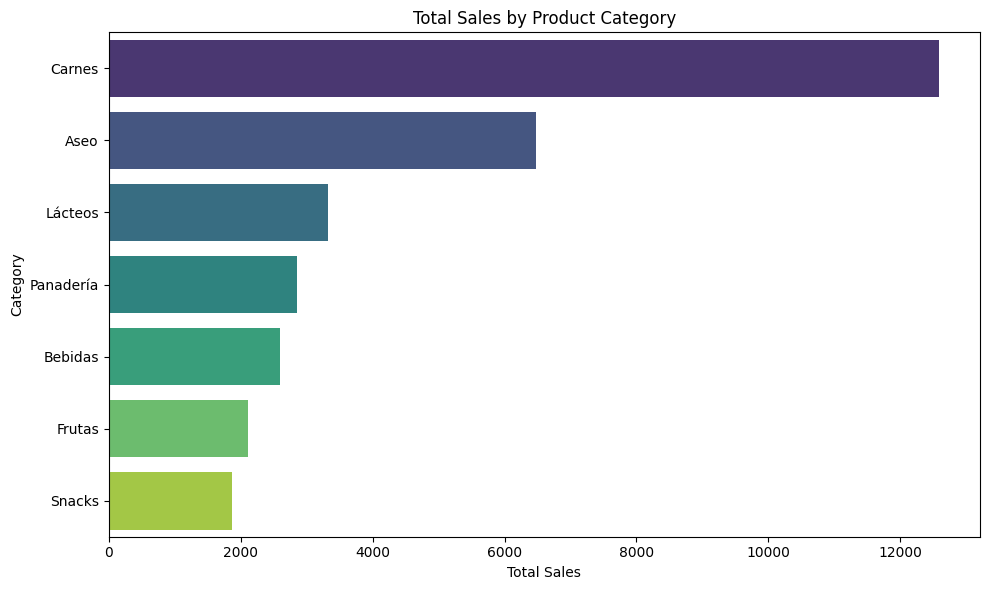

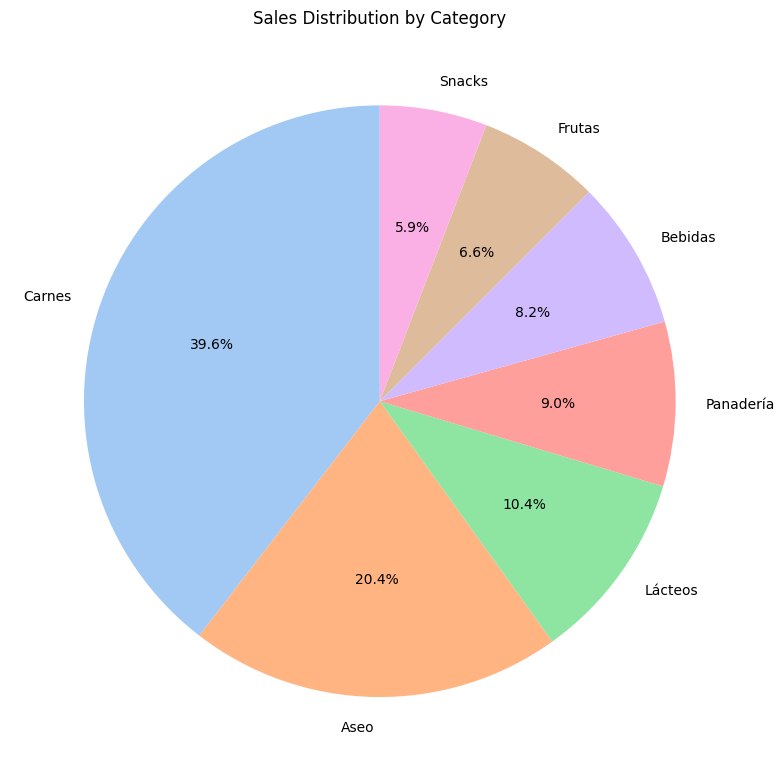

Highest revenue category: Carnes
Lowest revenue category: Snacks


In [2]:
# 📦 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🗂️ 2. Load the dataset
df = pd.read_csv('supermarket_sales_categories.csv')

# 🔍 3. Initial exploration
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

# 🧹 4. Data cleaning and validation
df['Date'] = pd.to_datetime(df['Date'])
df['TotalSales_Calculated'] = df['Quantity'] * df['UnitPrice']
df['ValidSales'] = df['TotalSales'] == df['TotalSales_Calculated']
print(f"Valid transactions: {df['ValidSales'].mean()*100:.2f}%")

# 📊 5. Sales by category
sales_by_category = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)
category_percentage = (sales_by_category / sales_by_category.sum()) * 100

# 📈 6. Visualization – Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 🥧 Visualization – Pie chart
plt.figure(figsize=(8,8))
sales_by_category.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 🧠 7. Basic insights
top_category = sales_by_category.idxmax()
low_category = sales_by_category.idxmin()
print(f"Highest revenue category: {top_category}")
print(f"Lowest revenue category: {low_category}")
